### Bibliotheken importieren

In [1]:
import pandas as pd
import nltk
from nltk import ConditionalFreqDist
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import spacy
import re
import ast






# nltk.download('punkt') # Punkt Tokenizer -> Satzerkennung

# pip install nltk
# pip install matplotlib pandas
# pip install spacy
# python -m spacy download en_core_web_sm

### Datenimport

In [2]:
# Datensets einlesen
sentence = pd.read_csv(r'sentence_dataset.csv',header= 0)
tt = pd.read_csv(r'tt_dataset.csv', delimiter= ',', header= 0)


### Data Understanding

#### Zeichenanzahl und Verhältnis

In [3]:
# TT
textGesamt = ''
for i in range(tt.shape[0]):
    text = tt['text'].iloc[i]
    textGesamt +=text

print('Der TT-Datensatz umfasst', len(textGesamt), 'Zeichen.')

# Sentence
textGesamtSent = ''
for i in range(sentence.shape[0]):
    text = sentence['sentence'].iloc[i]
    textGesamtSent+=text

print('Der Sentence-Datensatz umfasst', len(textGesamtSent), 'Zeichen.')

Der TT-Datensatz umfasst 208393 Zeichen.
Der Sentence-Datensatz umfasst 5684989 Zeichen.


In [4]:
verhältnis = len(textGesamtSent)/len(textGesamt)
verhältnis

27.280134169573834

#### Basierend auf vollständigen Tongue Twister und Satz

##### Durchschnittliche Satz/TT-Länge

In [5]:
# TT
längeZeile = tt['text'].apply(len)
durchschnittLänge = int(round(längeZeile.mean()))

print("Die durschschnittliche Länge der Toungue Twister beträgt (gerundet):" , durchschnittLänge, 'Zeichen.')

# Sentence
längeSent = sentence['sentence'].apply(len)
durchschnittSent = int(round(längeSent.mean()))

print("Die durschschnittliche Länge der Sätze beträgt (gerundet):" , durchschnittSent, 'Zeichen.')

Die durschschnittliche Länge der Toungue Twister beträgt (gerundet): 78 Zeichen.
Die durschschnittliche Länge der Sätze beträgt (gerundet): 56 Zeichen.


##### Fragestellung: Bestehen Tongue Twister in der Regel nur aus einem Satz?

In [6]:
# Funktionsdefinition
def zähle_sätze(Sätze):
    sätze = nltk.sent_tokenize(Sätze)
    return len(sätze)

In [7]:
# TT
tt['AnzahlSätze'] = tt['text'].apply(zähle_sätze)

durchschnittAnzahlSätzeTT = round(tt['AnzahlSätze'].mean(), 2)
maximaleAnzahlSätzeTT = round(tt['AnzahlSätze'].max(), 2)

print("Die durchschnittliche Anzahl von Sätzen der Tongue Twister ist (gerundet):", durchschnittAnzahlSätzeTT)
print("Die maximale Anzahl von Sätzen eines Tongue Twister ist (gerundet):", maximaleAnzahlSätzeTT)

größterTT = tt.loc[tt['AnzahlSätze'] == 66]
print(größterTT['text'])

# Überprüfung Annahme Sentence-Datensatz: Besteht immer aus einem Satz
sentence['AnzahlSätze'] = sentence['sentence'].apply(zähle_sätze)

durchschnittAnzahlSätzeSentence = round(sentence['AnzahlSätze'].max(), 2)

print("Die maximale Anzahl von Sätzen ist (gerundet):", durchschnittAnzahlSätzeSentence)

Die durchschnittliche Anzahl von Sätzen der Tongue Twister ist (gerundet): 1.45
Die maximale Anzahl von Sätzen eines Tongue Twister ist (gerundet): 66


871    Shrewd Simon Short sewed shoes. Seventeen summ...
Name: text, dtype: object
Die maximale Anzahl von Sätzen ist (gerundet): 1


##### Wortanzahl je Satz/TT und im Durchschnitt

In [8]:
# Funktionsdefinition
def wortanzahl (wortAnzahl):
    wörterZahl = wortAnzahl.split()
    return len(wörterZahl)

In [9]:
# TT
tt['Wortanzahl'] = tt['text'].apply(wortanzahl)
durchschnittWortanzahlTT = int(round(tt['Wortanzahl'].mean()))

print("Die durchschnittliche Wortanzahl der Tongue Twister beträgt (gerundet):" , durchschnittWortanzahlTT)

# Sentence
sentence['Wortanzahl'] = sentence['sentence'].apply(wortanzahl)
durchschnittWortanzahlSent = int(round(sentence['Wortanzahl'].mean()))

print("Die durchschnittliche Wortanzahl der Sätze beträgt (gerundet):" , durchschnittWortanzahlSent)

Die durchschnittliche Wortanzahl der Tongue Twister beträgt (gerundet): 13
Die durchschnittliche Wortanzahl der Sätze beträgt (gerundet): 10


##### Zählen der Wortlängen sowie deren Varianz je Satz/TT und im Durchschnitt

In [10]:
# Funktionsdefinition
def wortlängen(wort):
    wörter = wort.split()
    return [len(wort) for wort in wörter]

In [11]:
#TT
tt['Wortlängen'] = tt['text'].apply(wortlängen)  

varWortlängenTT = tt['Wortlängen'].apply(np.var)
tt['VarWortlängen'] = varWortlängenTT
durchVarWortlängenTT = round(varWortlängenTT.mean(),2)

print("Die durschnittliche Varianz der Wortlängen von Tongue Twistern beträgt (gerundet):" , durchVarWortlängenTT)

# Sentence
sentence['Wortlängen'] = sentence['sentence'].apply(wortlängen)  

varWortlängenSent = sentence['Wortlängen'].apply(np.var)
sentence['VarWortlängen'] = varWortlängenSent
durchVarWortlängenSent = round(varWortlängenSent.mean(),2)

print("Die durschnittliche Varianz der Wortlängen der Sätze beträgt (gerundet):" , durchVarWortlängenSent)

Die durschnittliche Varianz der Wortlängen von Tongue Twistern beträgt (gerundet): 4.11
Die durschnittliche Varianz der Wortlängen der Sätze beträgt (gerundet): 6.33


##### Zählen von Verben/Adjektiven und Nomen (unfertig)

In [12]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def zähle_Wortarten(text):
    tokens = word_tokenize(text)
    arten = pos_tag(tokens)
    
    # Hier filtern wir nur Adjektive, Nomen und Verben heraus
    relevanteArten = [tag for word, tag in arten if tag.startswith('JJ') or tag.startswith('NN') or tag.startswith('VB')]
    
    return Counter(relevanteArten)

print(zähle_Wortarten(textGesamt))



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\flosc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\flosc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Counter({'NN': 6712, 'NNP': 3695, 'JJ': 3554, 'VBD': 2126, 'NNS': 1997, 'VB': 1227, 'VBZ': 882, 'VBP': 832, 'VBG': 710, 'VBN': 411, 'JJR': 77, 'JJS': 40, 'NNPS': 15})


In [13]:
#Visualisieren der Anzahlen

###### Alternativen

In [14]:
#Funktionsdefinition

# Englisches Sprachmodell laden
nlp = spacy.load("en_core_web_sm")

def zähle_wortarten (text):
    textToken = nlp(text)
    posTags = [token.pos for token in textToken]
    counts = {
        'Verben': posTags.count('VERB'),
        'Adjektive': posTags.count('ADJ'),
        'Nomen': posTags.count('NOUN')
    }
    return counts

print(zähle_sätze(tt['text'].iloc[70]))

2


In [15]:
nltk.download('averaged_perceptron_tagger')

def count_pos_tags(sentence):
    tokens = word_tokenize(sentence)
    pos_tags = pos_tag(tokens)

    adj_count = 0
    verb_count = 0
    noun_count = 0

    for word, pos in pos_tags:
        if pos.startswith('JJ'):  # Adjective
            adj_count += 1
        elif pos.startswith('VB'):  # Verb
            verb_count += 1
        elif pos.startswith('NN'):  # Noun
            noun_count += 1

    return adj_count, verb_count, noun_count


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\flosc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [16]:
def count_pos_tags_spacy(sentence):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)

    adj_count = 0
    verb_count = 0
    noun_count = 0

    for token in doc:
        if token.pos_ == 'ADJ':  # Adjective
            adj_count += 1
        elif token.pos_ == 'VERB':  # Verb
            verb_count += 1
        elif token.pos_ == 'NOUN':  # Noun
            noun_count += 1

    return adj_count, verb_count, noun_count

In [17]:
test = tt['text'].iloc[2]
adAnzahl, verbAnzahl, nomenANzahl = count_pos_tags_spacy(test)
print(adAnzahl, verbAnzahl, nomenANzahl)

1 3 2


In [18]:
test = tt['text'].iloc[2]
adAnzahl, verbAnzahl, nomenANzahl = count_pos_tags(test)
print (test)
print(adAnzahl, verbAnzahl, nomenANzahl)

How many boards Could the Mongols hoard If the Mongol hordes got bored?
1 2 5


In [19]:
nlp = spacy.load("en_core_web_sm")
print(nlp(tt['text'].iloc[2]))

# test = zähle_sätze(tt['text'].iloc[2])
print(zähle_sätze(tt['text'].iloc[2]))

How many boards Could the Mongols hoard If the Mongol hordes got bored?
1


##### Konsonantenpaare und Vokalpaare 

In [20]:
# Funktionsdefinition Konsonatenpaare
def zähle_konsonanten(text):
    konsonanten = re.findall(r'[bcdfghjklmnpqrstvwxz][bcdfghjklmnpqrstvwxz]', text) 
    cfd_kon = [(kon, kon) for kon in konsonanten]
    cfd = nltk.ConditionalFreqDist(cfd_kon)
    return cfd

In [21]:
# Funktionsdefinition Vokalpaare
def zähle_vokale(text):
    vokale = re.findall(r'[aeiouy][aeiouy]', text) 
    cfd_vok = [(vok, vok) for vok in vokale]
    cfd = nltk.ConditionalFreqDist(cfd_vok)
    return cfd

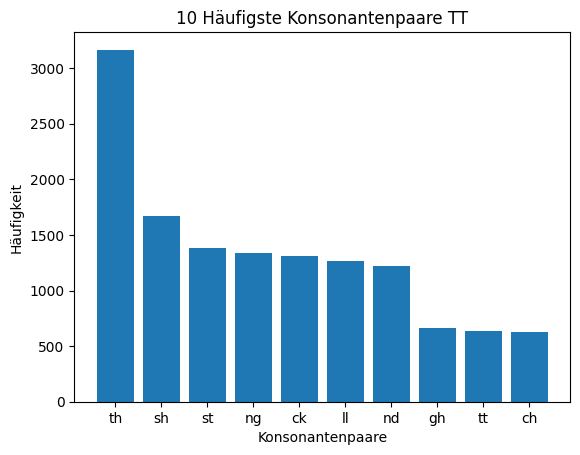

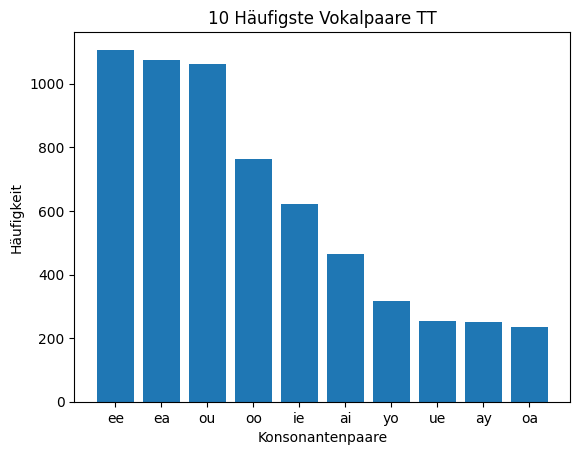

In [22]:
# TT
konHäufigkeitTT = zähle_konsonanten(textGesamt)
vokHäufigkeitTT = zähle_vokale(textGesamt)

# Matrixdarstellung
# konHäufigkeitTT.tabulate()
# vokHäufigkeitTT.tabulate()

topPaareKonTT = sorted(konHäufigkeitTT.conditions(), key=lambda x: konHäufigkeitTT[x].N(), reverse=True)[:10] # <- 10 Häufigsten
konsonantenTT, häufigkeitenTT = zip(*[(pair, konHäufigkeitTT[pair].N()) for pair in topPaareKonTT])
# print(topPaareKonTT)
topPaareVokTT = sorted(vokHäufigkeitTT.conditions(), key=lambda x: vokHäufigkeitTT[x].N(), reverse=True)[:10] # <- 10 Häufigsten
vokaleTT, häufigkeitenVTT = zip(*[(pair, vokHäufigkeitTT[pair].N()) for pair in topPaareVokTT])

# Visualisierung
plt.bar(konsonantenTT, häufigkeitenTT)
plt.title('10 Häufigste Konsonantenpaare TT')
plt.xlabel('Konsonantenpaare')
plt.ylabel('Häufigkeit')
plt.show()

# Visualisierung
plt.bar(vokaleTT, häufigkeitenVTT)
plt.title('10 Häufigste Vokalpaare TT')
plt.xlabel('Konsonantenpaare')
plt.ylabel('Häufigkeit')
plt.show()


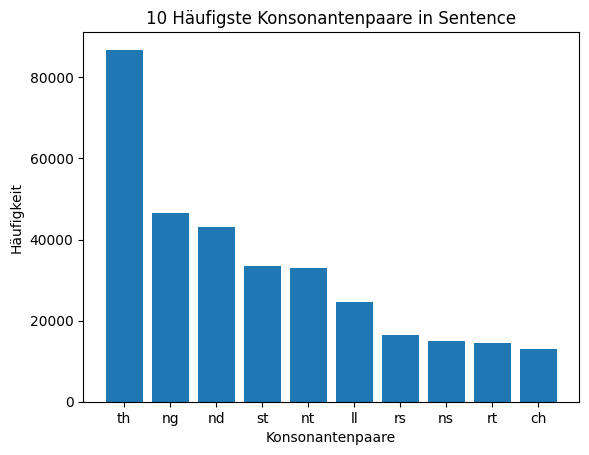

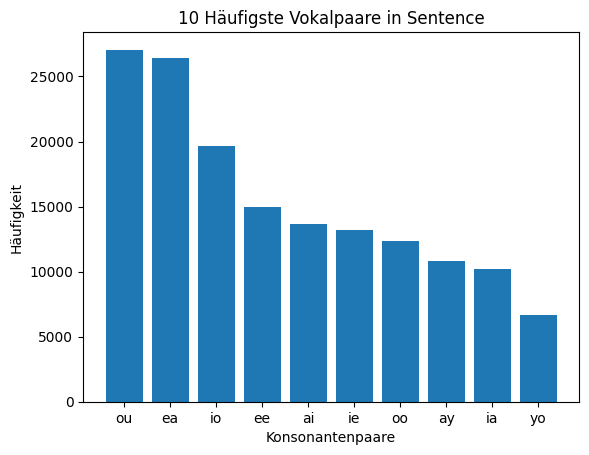

In [23]:
# Sentence
konHäufigkeitSent = zähle_konsonanten(textGesamtSent)
vokHäufigkeitSent = zähle_vokale(textGesamtSent)

# Matrixdarstellung
# konHäufigkeitSent.tabulate()
# vokHäufigkeitSent.tabulate()

topPaareKonSent = sorted(konHäufigkeitSent.conditions(), key=lambda x: konHäufigkeitSent[x].N(), reverse=True)[:10] # <- 10 Häufigsten
konsonantenSent, häufigkeitenSent = zip(*[(pair, konHäufigkeitSent[pair].N()) for pair in topPaareKonSent])
# print(topPaareKonTT)
topPaareVokSent = sorted(vokHäufigkeitSent.conditions(), key=lambda x: vokHäufigkeitSent[x].N(), reverse=True)[:10] # <- 10 Häufigsten
vokaleSent, häufigkeitenVSent = zip(*[(pair, vokHäufigkeitSent[pair].N()) for pair in topPaareVokSent])

# Visualisierung
plt.bar(konsonantenSent, häufigkeitenSent)
plt.title('10 Häufigste Konsonantenpaare in Sentence')
plt.xlabel('Konsonantenpaare')
plt.ylabel('Häufigkeit')
plt.show()

# Visualisierung
plt.bar(vokaleSent, häufigkeitenVSent)
plt.title('10 Häufigste Vokalpaare in Sentence')
plt.xlabel('Konsonantenpaare')
plt.ylabel('Häufigkeit')
plt.show()

##### Häufigste und seltenste Wörter

In [24]:
# Funktionsdefinition Häufigste (ohne Stoppwörter)
# nltk.download('punkt')
nltk.download('stopwords')

def zähle_Häufigste_Wörter(text, anzahlWörter=10):
    wörter = word_tokenize(text)
    
    # Entfernen von Stoppwörtern 
    stoppwörter = set(stopwords.words('english'))  # Liste der englischen Stoppwörter
    wörter = [wort.lower() for wort in wörter if wort.isalpha() and wort.lower() not in stoppwörter]
    
    wortanzahl = Counter(wörter)
    
    häufigsteWörter = wortanzahl.most_common(anzahlWörter)
    
    return häufigsteWörter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flosc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# Funktionsdefinition Häufigste (mit Stoppwörter)
# nltk.download('punkt')

def zähle_Häufigste_Wörter_Stopp(text, anzahlWörter=10):
    wörter = word_tokenize(text)
    
    wörter = [wort.lower() for wort in wörter if wort.isalpha()]
    
    wortanzahl = Counter(wörter)
    
    häufigsteWörter = wortanzahl.most_common(anzahlWörter)
    
    return häufigsteWörter

In [26]:
# Funktionsdefinition Seltenste (ohne Stoppwörter)
# nltk.download('punkt')
nltk.download('stopwords')

def zähle_Seltenste_Wörter(text, anzahlWörter=10):
    wörter = word_tokenize(text)
    
    # Entfernen von Stoppwörtern 
    stoppwörter = set(stopwords.words('english'))  # Liste der englischen Stoppwörter
    wörter = [wort.lower() for wort in wörter if wort.isalpha() and wort.lower() not in stoppwörter]
    
    wortanzahl = Counter(wörter)
    
    seltensteWörter = wortanzahl.most_common()[:-anzahlWörter-1:-1]
    
    return seltensteWörter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flosc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# Funktionsdefinition Seltenste (mit Stoppwörter)
# nltk.download('punkt')

def zähle_Seltenste_Wörter_Stopp(text, anzahlWörter=10):
    wörter = word_tokenize(text)
    
    wörter = [wort.lower() for wort in wörter if wort.isalpha()]
    
    wortanzahl = Counter(wörter)
    
    seltensteWörter = wortanzahl.most_common()[:-anzahlWörter-1:-1]
    
    return seltensteWörter

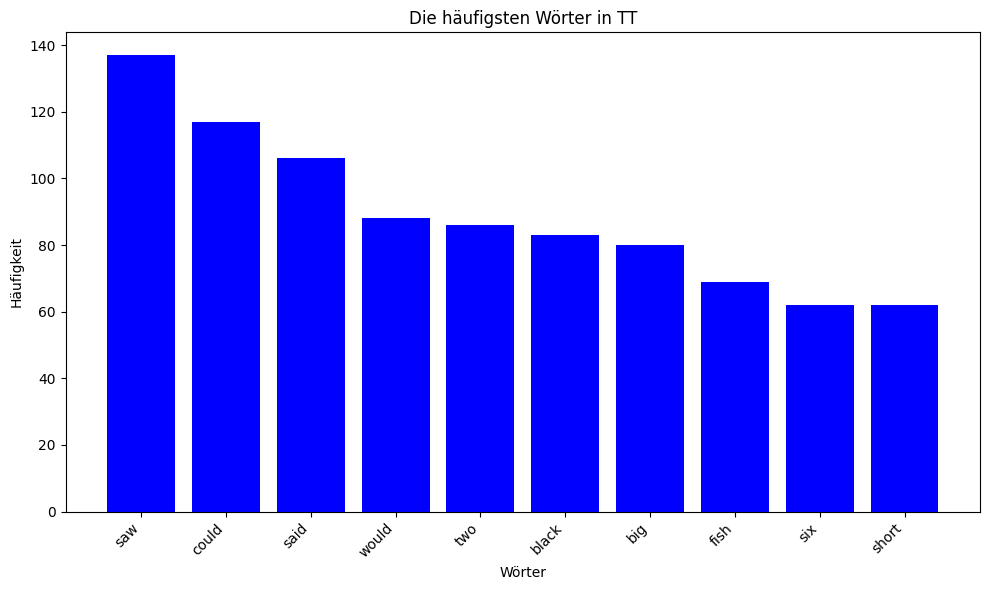

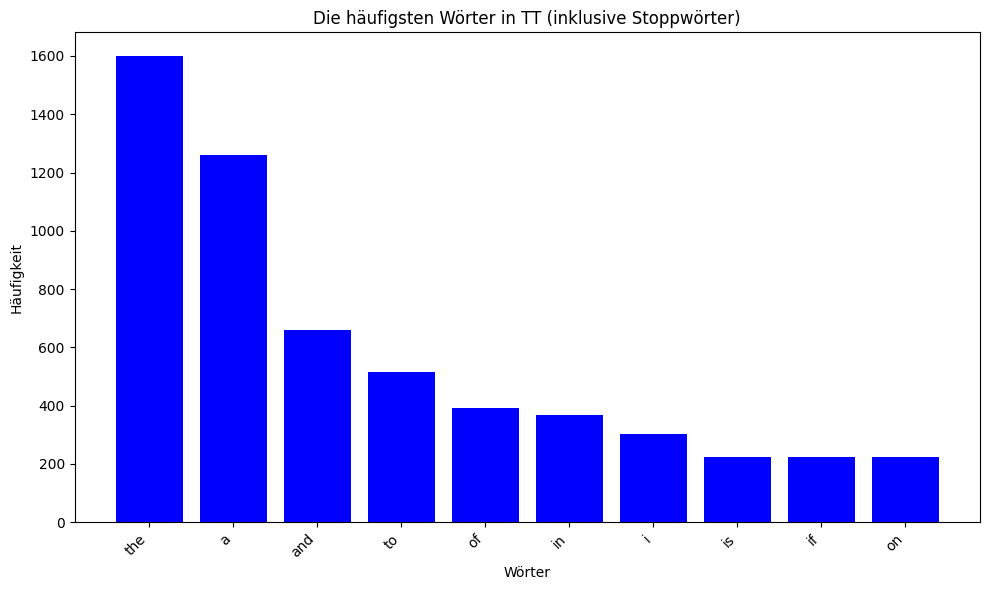

[('cantelope', 1),
 ('druivensap', 1),
 ('donkere', 1),
 ('drabbig', 1),
 ('deciliter', 1),
 ('dagelijks', 1),
 ('depressieve', 1),
 ('dachten', 1),
 ('dochters', 1),
 ('domme', 1)]

In [28]:
# TT (ohne Stoppwörter)
top10häufigsteWörterTT = zähle_Häufigste_Wörter(textGesamt, anzahlWörter=10)
top10wenigstenWörterTT = zähle_Seltenste_Wörter(textGesamt, anzahlWörter=10)

wörter, anzahl = zip(*top10häufigsteWörterTT)

# Visualisierung 
plt.figure(figsize=(10, 6))
plt.bar(wörter, anzahl, color='blue')
plt.xlabel('Wörter')
plt.ylabel('Häufigkeit')
plt.title('Die häufigsten Wörter in TT')
plt.xticks(rotation=45, ha='right')  # Rotiere x-Achsentext für bessere Lesbarkeit
plt.tight_layout()
plt.show()

top10wenigstenWörterTT


# TT (mit Stoppwörter)
top10häufigsteWörterTTStopp = zähle_Häufigste_Wörter_Stopp(textGesamt, anzahlWörter=10)
top10wenigstenWörterTTStopp = zähle_Seltenste_Wörter_Stopp(textGesamt, anzahlWörter=10)

wörter, anzahl = zip(*top10häufigsteWörterTTStopp)

# Visualisierung 
plt.figure(figsize=(10, 6))
plt.bar(wörter, anzahl, color='blue')
plt.xlabel('Wörter')
plt.ylabel('Häufigkeit')
plt.title('Die häufigsten Wörter in TT (inklusive Stoppwörter)')
plt.xticks(rotation=45, ha='right')  # Rotiere x-Achsentext für bessere Lesbarkeit
plt.tight_layout()
plt.show()

top10wenigstenWörterTTStopp

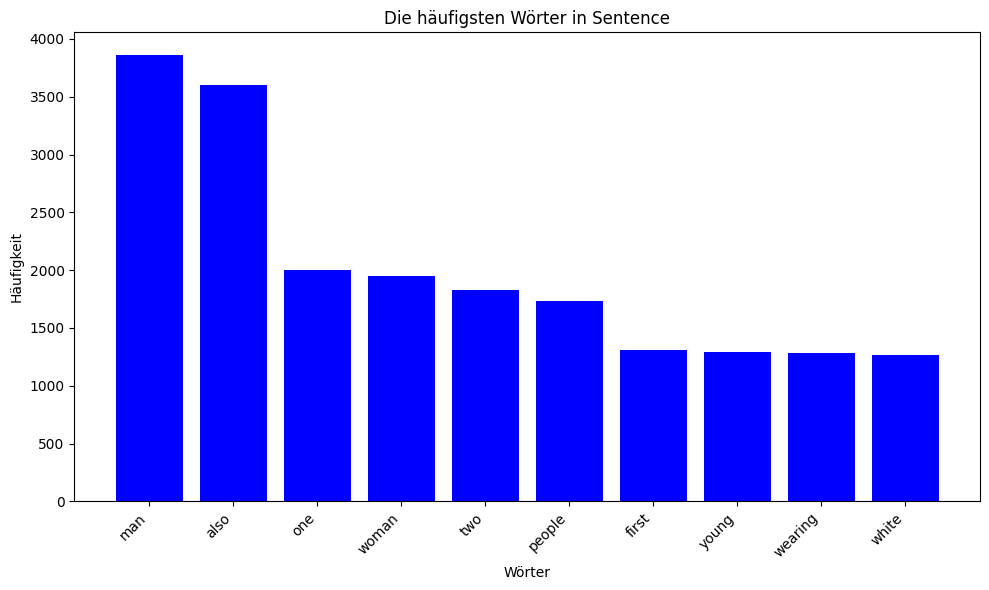

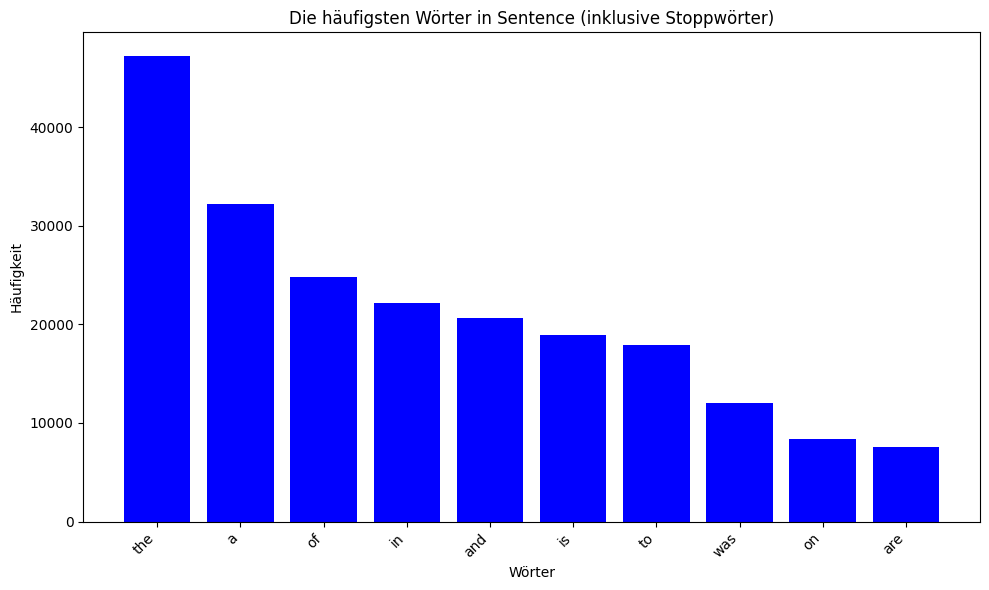

[('milnor', 1),
 ('metamorph', 1),
 ('mak', 1),
 ('transliterated', 1),
 ('dortmundlanstrop', 1),
 ('fluminense', 1),
 ('atkinsons', 1),
 ('couchgrass', 1),
 ('khoekhoen', 1),
 ('melvyn', 1)]

In [29]:
# Sentence (ohne Stoppwörter)
# TT
top10häufigsteWörterSent = zähle_Häufigste_Wörter(textGesamtSent, anzahlWörter=10)
top10wenigstenWörterSent = zähle_Seltenste_Wörter(textGesamtSent, anzahlWörter=10)

wörterSent, anzahlSent = zip(*top10häufigsteWörterSent)

# Visualisierung 
plt.figure(figsize=(10, 6))
plt.bar(wörterSent, anzahlSent, color='blue')
plt.xlabel('Wörter')
plt.ylabel('Häufigkeit')
plt.title('Die häufigsten Wörter in Sentence')
plt.xticks(rotation=45, ha='right')  # Rotiere x-Achsentext für bessere Lesbarkeit
plt.tight_layout()
plt.show()

top10wenigstenWörterSent

# Sentence (mit Stoppwörter)
# TT
top10häufigsteWörterSentStopp = zähle_Häufigste_Wörter_Stopp(textGesamtSent, anzahlWörter=10)
top10wenigstenWörterSentStopp = zähle_Seltenste_Wörter_Stopp(textGesamtSent, anzahlWörter=10)

wörterSent, anzahlSent = zip(*top10häufigsteWörterSentStopp)

# Visualisierung 
plt.figure(figsize=(10, 6))
plt.bar(wörterSent, anzahlSent, color='blue')
plt.xlabel('Wörter')
plt.ylabel('Häufigkeit')
plt.title('Die häufigsten Wörter in Sentence (inklusive Stoppwörter)')
plt.xticks(rotation=45, ha='right')  # Rotiere x-Achsentext für bessere Lesbarkeit
plt.tight_layout()
plt.show()

top10wenigstenWörterSentStopp

#### Basierend auf Phoneme

##### Phonemhäufigkeiten je Datensatz

In [30]:
# Funktionsdefinition
# Alternative FreqDist (NLTK) L01/88 + Hapaxes (L01/90) (noch nicht betrachtet)
def zähle_phoneme(listeVonListen):
    phonemHäufigkeit = Counter()

    for phonemStr in listeVonListen:
        phonemStr = phonemStr.replace('[', '').replace(']', '').replace("'", '')
        phoneme = phonemStr.split(",")
        phonemHäufigkeit.update(phoneme)
    return phonemHäufigkeit

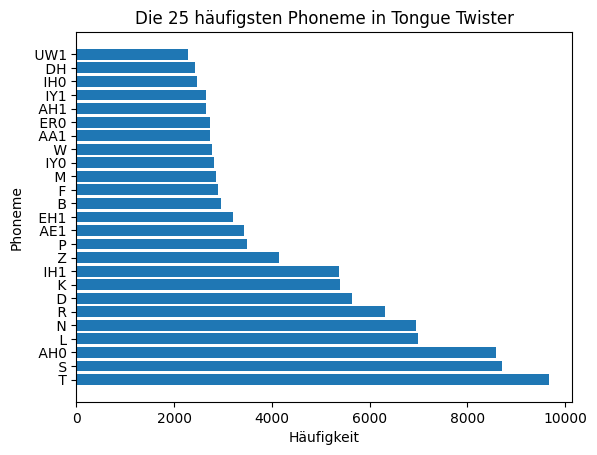

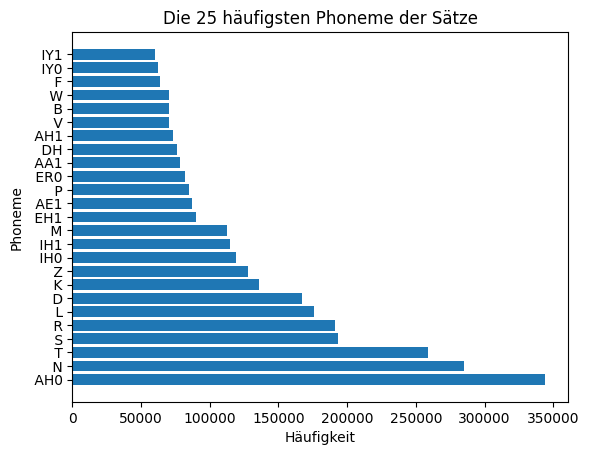

In [31]:
### TT
phoneme = tt['phonemes']
anzahlPhoneme = zähle_phoneme(phoneme)

dfAnzahlPhoneme = pd.DataFrame(list(anzahlPhoneme.items()), columns=['Phonem', 'Häufigkeit'])

# Sortiere das DataFrame nach der Häufigkeit
dfAnzahlPhoneme = dfAnzahlPhoneme.sort_values(by='Häufigkeit', ascending=False)

# Speichern der 25 häufigsten Phoneme
top25 = dfAnzahlPhoneme.head(25)

#Visualisierung in einem Balkendiagramm
plt.barh(top25['Phonem'], top25['Häufigkeit'])
plt.xlabel('Häufigkeit')
plt.ylabel('Phoneme')
plt.title('Die 25 häufigsten Phoneme in Tongue Twister')
plt.show()


### Sentence
sentencePhoneme = sentence['phonemes']
anzahlPhonemeSent = zähle_phoneme(sentencePhoneme)
dfAnzahlPhonemeSent = pd.DataFrame(list(anzahlPhonemeSent.items()), columns=['Phonem', 'Häufigkeit'])

# Sortiere das DataFrame nach der Häufigkeit
dfAnzahlPhonemeSent = dfAnzahlPhonemeSent.sort_values(by='Häufigkeit', ascending=False)

# Speichern der 25 häufigsten Phoneme
top25Sent = dfAnzahlPhonemeSent.head(25)

#Visualisierung in einem Balkendiagramm
plt.barh(top25Sent['Phonem'], top25Sent['Häufigkeit'])
plt.xlabel('Häufigkeit')
plt.ylabel('Phoneme')
plt.title('Die 25 häufigsten Phoneme der Sätze')
plt.show()

##### Phonemhäufigkeiten je Zeile

In [32]:
# Phonemhäufigkeiten je TT/Satz (Überprüfung ob mehr gleiche/Wiederholungen/ähnliche vorkommen -> zeichnet TT aus)

##### Reimüberprüfung

In [33]:
# Reime herausfinden (L01/131) oder eigener Ansatz (Schleifen etc.) 
# Letzten beiden oder letztes Phoneme je Wort in TT mit anderen vergleichen (wenn gleich, dann könnte es ein Reim sein)
# Phoneme in Liste, dann i Element = Wort und x Element dabon ist Phonem (Distances/60)
# ph_list = ast.literal_eval(df['phonemes'][0])
# ph_list[0][1]

In [66]:
# Funktionsdefinition
def suche_Reime(phonemListe):
    reimListe = []
    reimAufPhonemListe = []
    keinReimLliste = []

    for i in range(len(phonemListe) - 1):
        aktuellesWort = phonemListe[i]
        nächstesWort = phonemListe[i + 1]

        if len(aktuellesWort) >= 2 and len(nächstesWort) >= 2:
            letztesPhonemAktuell = aktuellesWort[-1]
            vorletztesPhonemAktuell = aktuellesWort[-2]

            letztesPhonemNächstes = nächstesWort[-1]
            vorletztesPhonemNächstes = nächstesWort[-2]

            if letztesPhonemAktuell == letztesPhonemNächstes:
                if vorletztesPhonemAktuell == vorletztesPhonemNächstes:
                    reimListe.append(aktuellesWort)
                else:
                    reimAufPhonemListe.append(aktuellesWort)
            else:
                keinReimLliste.append(aktuellesWort)

    anzahlKeinReim = len(keinReimLliste)
    return reimListe, reimAufPhonemListe, anzahlKeinReim

Anzahl der gefundenen Reime: 1124
Anzahl der Reime auf dem letzten Phonem: 2020
Anzahl von Kein Reim: 29157


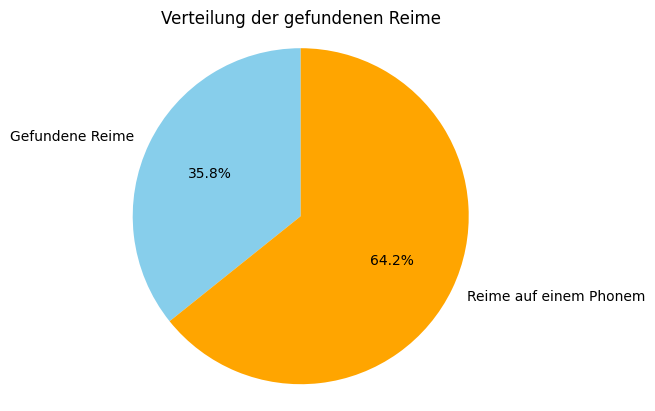

In [75]:
# TT
phonemListeTT = []
for index, row in tt.iterrows():
    ttText = row['text']
    phonemStringTT = row['phonemes']
    ph_listTT = ast.literal_eval(phonemStringTT)
    phonemListeTT += ph_listTT
reimListe, reimAufPhonemListe, anzahlKeinReim = suche_Reime(phonemListeTT)

anzahlReime = len(reimListe)
anzahlReimeAufPhonem = len(reimAufPhonemListe)

# Ausgabe
print("Anzahl der gefundenen Reime:", anzahlReime)
print("Anzahl der Reime auf dem letzten Phonem:", anzahlReimeAufPhonem)
print("Anzahl von Kein Reim:", anzahlKeinReim)

# Visualisierung
labels = ['Gefundene Reime', 'Reime auf einem Phonem']
sizes = [anzahlReime, anzahlReimeAufPhonem]
colors = ['skyblue', 'orange']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Verteilung der gefundenen Reime')
plt.show()

# Visualisierung
# kategorien = ['Gefundene Reime', 'Reime auf dem letzten Phonem']
# anzahlen = [anzahlReime, anzahlReimeAufPhonem]

# plt.bar(kategorien, anzahlen, color=['blue', 'orange'])
# plt.xlabel('Kategorie')
# plt.ylabel('Anzahl')
# plt.title('Anzahl der gefundenen Reime im TT-Datensatz')
# plt.show()


Anzahl der gefundenen Reime: 5176
Anzahl der Reime auf dem letzten Phonem: 42566
Anzahl von Kein Reim: 843597


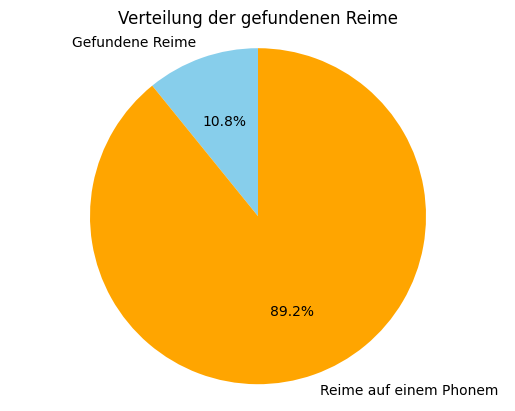

In [77]:
# Sentence
phonemListeSent = []
for index, row in sentence.iterrows():
    sentText = row['sentence']
    phonemStringSent = row['phonemes']
    ph_listSent = ast.literal_eval(phonemStringSent)
    phonemListeSent += ph_listSent

reimListe, reimAufPhonemListe, anzahlKeinReim = suche_Reime(phonemListeSent)

anzahlReime = len(reimListe)
anzahlReimeAufPhonem = len(reimAufPhonemListe)

# Ausgabe
print("Anzahl der gefundenen Reime:", anzahlReime)
print("Anzahl der Reime auf dem letzten Phonem:", anzahlReimeAufPhonem)
print("Anzahl von Kein Reim:", anzahlKeinReim)

# Visualisierung
labels = ['Gefundene Reime', 'Reime auf einem Phonem']
sizes = [anzahlReime, anzahlReimeAufPhonem]
colors = ['skyblue', 'orange']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Verteilung der gefundenen Reime')
plt.show()

# Visualisierung
# kategorien = ['Gefundene Reime', 'Reime auf dem letzten Phonem']
# anzahlen = [anzahlReime, anzahlReimeAufPhonem]

# plt.bar(kategorien, anzahlen, color=['blue', 'orange'])
# plt.xlabel('Kategorie')
# plt.ylabel('Anzahl')
# plt.title('Anzahl der gefundenen Reime im Sentence-Datensatz')
# plt.show()

##### Überprüfung auf ABBA oder ABAB Wiederholung

In [34]:
# Herausfinden von Phonemwiederholungen in der ABBA oder ABAB-Form
#Funktionsdefinition ()
def zähle_ABBA_ABAB (phonemListe):
    first_list = []
    for i in range(len(phonemListe)):
        for y in range(len(phonemListe[i])):
            first_list.append(phonemListe[i][y]) #Ich möchte eigentlich das erste Phonem je Wort, also y=0 oder? + später (wenn wir letztes anschauen) dann len(phonemListe[i][-1]) bzw. bei Indexierung einfach -1

    abab_counter = 0
    abba_counter = 0
    p1 = first_list[0]
    p2 = first_list[1]
    for i in range(len(first_list)-3):
        # check Ungleichheit
        if p1 != p2:
            # check ABAB
            if first_list[i+2]==p1 and first_list[i+3]==p2:
                abab_counter += 1
            # check ABBA
            elif first_list[i+2]==p2 and first_list[i+3]==p1:
                abba_counter += 1
        # Inkrement der aktuellen phoneme
        p1 = first_list[i+1]
        p2 = first_list[i+2]
    return p1,p2,abab_counter,abba_counter

In [35]:
# ABBA und ABAB 
# Index in Liste 0 (Erstes) -1 (Letztes)
# TT
phonemListeTT = []
for index, row in tt.iterrows():
    ttText = row['text']
    phonemStringTT = row['phonemes']
    ph_listTT = ast.literal_eval(phonemStringTT)
    phonemListeTT += ph_listTT


print(len(phonemListeTT))
print(phonemListeTT)
aundBPhonemTT = zähle_ABBA_ABAB(phonemListeTT)
print(aundBPhonemTT)

# Sentence
# phonemListeSent = []
# for index, row in sentence.iterrows():
#     sentText = row['sentence']
#     phonemStringSent = row['phonemes']
#     ph_listSent = ast.literal_eval(phonemStringSent)
#     phonemListeSent += ph_listSent

# aundBPhonemSent = zähle_ABBA_ABAB(phonemListeSent)
# aundBPhonemSent

35817
[['P', 'IY1', 'T', 'ER0'], ['P', 'AY1', 'P', 'ER0'], ['P', 'IH1', 'K', 'T'], ['AH0'], ['P', 'EH1', 'K'], ['AH1', 'V'], ['P', 'IH1', 'K', 'AH0', 'L', 'D'], ['P', 'EH1', 'P', 'ER0', 'Z'], ['AH0'], ['P', 'EH1', 'K'], ['AH1', 'V'], ['P', 'IH1', 'K', 'AH0', 'L', 'D'], ['P', 'EH1', 'P', 'ER0', 'Z'], ['P', 'IY1', 'T', 'ER0'], ['P', 'AY1', 'P', 'ER0'], ['P', 'IH1', 'K', 'T'], ['IH1', 'F'], ['P', 'IY1', 'T', 'ER0'], ['P', 'AY1', 'P', 'ER0'], ['P', 'IH1', 'K', 'T'], ['AH0'], ['P', 'EH1', 'K'], ['AH1', 'V'], ['P', 'IH1', 'K', 'AH0', 'L', 'D'], ['P', 'EH1', 'P', 'ER0', 'Z'], ['W', 'EH1', 'R', 'Z'], ['DH', 'AH0'], ['P', 'EH1', 'K'], ['AH1', 'V'], ['P', 'IH1', 'K', 'AH0', 'L', 'D'], ['P', 'EH1', 'P', 'ER0', 'Z'], ['P', 'IY1', 'T', 'ER0'], ['P', 'AY1', 'P', 'ER0'], ['P', 'IH1', 'K', 'T'], ['AY1'], ['S', 'AO1'], ['S', 'UW1', 'Z', 'IY0'], ['S', 'IH1', 'T', 'IH0', 'NG'], ['IH0', 'N'], ['AH0'], ['SH', 'UW1'], ['SH', 'AY1', 'N'], ['SH', 'AA1', 'P'], ['W', 'EH1', 'R'], ['SH', 'IY1'], ['S', 'IH1', 'T'

#### Basierend auf Soundex

##### Häufigkeiten je Datensatz

In [36]:
#Funktionsdefinition
def zähle_soundex(listeVonListen):
    soundexHäufigkeit = Counter()

    for soundexStr in listeVonListen:
        soundexStr = soundexStr.replace('[', '').replace(']', '').replace("'", '')
        soundex = soundexStr.split(",")
        soundexHäufigkeit.update(soundex)
    return soundexHäufigkeit

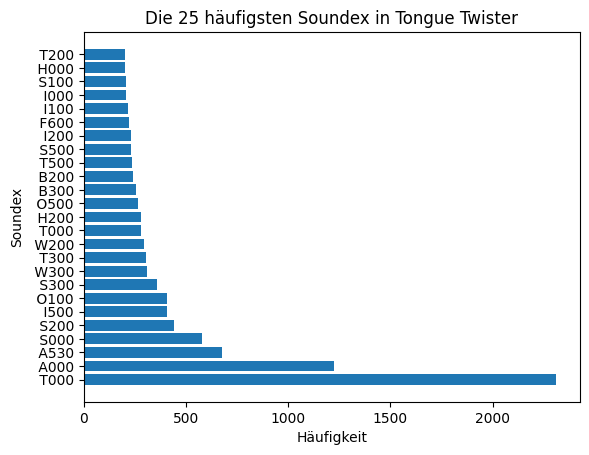

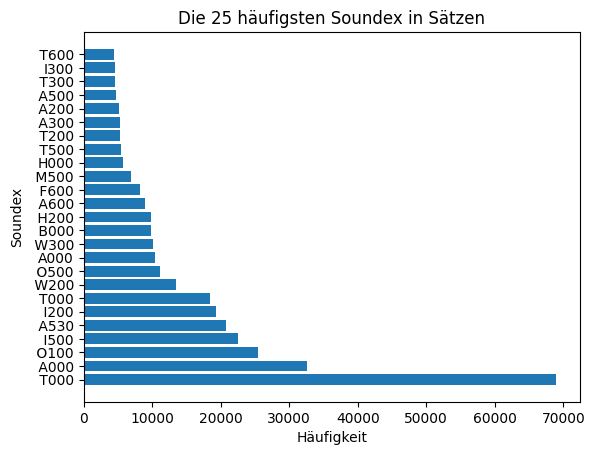

In [37]:
# TT
sound = tt['soundex']
anzahlSound = zähle_soundex(sound)
dfAnzahlSoundex = pd.DataFrame(list(anzahlSound.items()), columns=['Soundex', 'Häufigkeit'])

# Sortiere das DataFrame nach der Häufigkeit
dfAnzahlSoundex = dfAnzahlSoundex.sort_values(by='Häufigkeit', ascending=False)

# Speichern der 25 häufigsten Phoneme
top25Sound = dfAnzahlSoundex.head(25)

#Visualisierung in einem Balkendiagramm
plt.barh(top25Sound['Soundex'], top25Sound['Häufigkeit'])
plt.xlabel('Häufigkeit')
plt.ylabel('Soundex')
plt.title('Die 25 häufigsten Soundex in Tongue Twister')
plt.show()


### Sentence
soundSent = sentence['soundex']
anzahlSoundSent = zähle_soundex(soundSent)
dfAnzahlSoundexSent = pd.DataFrame(list(anzahlSoundSent.items()), columns=['Soundex', 'Häufigkeit'])

# Sortiere das DataFrame nach der Häufigkeit
dfAnzahlSoundexSent = dfAnzahlSoundexSent.sort_values(by='Häufigkeit', ascending=False)

# Speichern der 25 häufigsten Phoneme
top25SoundSent = dfAnzahlSoundexSent.head(25)

#Visualisierung in einem Balkendiagramm
plt.barh(top25SoundSent['Soundex'], top25SoundSent['Häufigkeit'])
plt.xlabel('Häufigkeit')
plt.ylabel('Soundex')
plt.title('Die 25 häufigsten Soundex in Sätzen')
plt.show()

##### Häufigkeiten je Zeile

In [38]:
# Soundexhäufigkeiten je TT/Satz (Überprüfung ob mehr gleiche/Wiederholungen/ähnliche vorkommen -> zeichnet TT aus)
# Wie häufig ein Soundex im Satz

### Output Tabellen

In [39]:
# TT
tt

,text,phonemes,soundex,AnzahlSätze,Wortanzahl,Wortlängen,VarWortlängen
0,Peter Piper picked a peck of pickled peppers. ...,"[['P', 'IY1', 'T', 'ER0'], ['P', 'AY1', 'P', '...","['P360', 'P160', 'P230', 'A000', 'P200', 'O100...",3,34,"[5, 5, 6, 1, 4, 2, 7, 8, 1, 4, 2, 7, 7, 5, 5, ...",4.575260
1,I saw Susie sitting in a shoe shine shop. Wher...,"[['AY1'], ['S', 'AO1'], ['S', 'UW1', 'Z', 'IY0...","['I000', 'S000', 'S200', 'S352', 'I500', 'A000...",2,20,"[1, 3, 5, 7, 2, 1, 4, 5, 5, 5, 3, 4, 3, 7, 3, ...",2.800000
2,How many boards Could the Mongols hoard If the...,"[['HH', 'AW1'], ['M', 'EH1', 'N', 'IY0'], ['B'...","['H000', 'M500', 'B632', 'C430', 'T000', 'M524...",1,13,"[3, 4, 6, 5, 3, 7, 5, 2, 3, 6, 6, 3, 6]",2.402367
3,How can a clam cram in a clean cream can?,"[['HH', 'AW1'], ['K', 'AE1', 'N'], ['AH0'], ['...","['H000', 'C500', 'A000', 'C450', 'C650', 'I500...",1,10,"[3, 3, 1, 4, 4, 2, 1, 5, 5, 4]",1.960000
4,Send toast to ten tense stout saints' ten tall...,"[['S', 'EH1', 'N', 'D'], ['T', 'OW1', 'S', 'T'...","['S530', 'T230', 'T000', 'T500', 'T520', 'S330...",1,10,"[4, 5, 2, 3, 5, 5, 7, 3, 4, 6]",2.040000
...,...,...,...,...,...,...,...
2671,Then step up mister and twist your tongue,"[['DH', 'EH1', 'N'], ['S', 'T', 'EH1', 'P'], [...","['T500', 'S310', 'U100', 'M236', 'A530', 'T230...",1,8,"[4, 4, 2, 6, 3, 5, 4, 6]",1.687500
2672,Now Kissle will whistle at busty Miss. Russell...,"[['N', 'AW1'], ['K', 'IH1', 'S', 'AH0', 'L'], ...","['N000', 'K240', 'W400', 'W234', 'A300', 'B230...",2,31,"[3, 6, 4, 7, 2, 5, 5, 7, 6, 6, 3, 6, 4, 6, 4, ...",3.506764
2673,"Purple paper people, purple paper people, purp...","[['P', 'ER1', 'P', 'AH0', 'L'], ['P', 'EY1', '...","['P614', 'P160', 'P140', 'P614', 'P160', 'P140...",1,10,"[6, 5, 7, 6, 5, 7, 6, 5, 7, 3]",1.410000
2674,De doorgaans dappere Durgerdammer drukker Dirk...,"[['D', 'IY1'], ['D', 'AO1', 'R', 'G', 'AH0', '...","['D000', 'D625', 'D160', 'D626', 'D626', 'D620...",2,53,"[2, 9, 7, 12, 7, 4, 10, 3, 8, 5, 9, 5, 12, 6, ...",8.142399


In [40]:
# Sentence
sentence

,sentence,phonemes,soundex,AnzahlSätze,Wortanzahl,Wortlängen,VarWortlängen
0,He was accorded a State funeral and was buried...,"[['HH', 'IY1'], ['W', 'AA1', 'Z'], ['AH0', 'K'...","['H000', 'W200', 'A263', 'A000', 'S330', 'F564...",1,14,"[2, 3, 8, 1, 5, 7, 3, 3, 6, 2, 7, 3, 9, 9]",7.122449
1,In American English whilst is considered to be...,"[['IH0', 'N'], ['AH0', 'M', 'EH1', 'R', 'AH0',...","['I500', 'A562', 'E524', 'W423', 'I200', 'C523...",1,11,"[2, 8, 7, 6, 2, 10, 2, 2, 11, 2, 8]",11.520661
2,Once again she is seen performing on a compute...,"[['W', 'AH1', 'N', 'S'], ['AH0', 'G', 'EH1', '...","['O520', 'A250', 'S000', 'I200', 'S500', 'P616...",1,10,"[4, 5, 3, 2, 4, 10, 2, 1, 17, 6]",20.840000
3,Hippety Hopper returns in McKimsons Pop Im Pop.,"[['HH', 'IH1', 'P', 'AH0', 'T', 'IY0'], ['HH',...","['H130', 'H160', 'R365', 'I500', 'M252', 'P100...",1,8,"[7, 6, 7, 2, 9, 3, 2, 4]",6.000000
4,Today their programs are available on the Inte...,"[['T', 'AH0', 'D', 'EY1'], ['DH', 'EH1', 'R'],...","['T300', 'T600', 'P626', 'A600', 'A141', 'O500...",1,8,"[5, 5, 8, 3, 9, 2, 3, 9]",7.000000
...,...,...,...,...,...,...,...
101098,Force B Adml.,"[['F', 'AO1', 'R', 'S'], ['B', 'IY1'], [], ['A...","['F620', 'B000', 'A354']",1,3,"[5, 1, 5]",3.555556
101099,It has less complex feature than other micropr...,"[['IH1', 'T'], ['HH', 'AE1', 'Z'], ['L', 'EH1'...","['I300', 'H200', 'L200', 'C514', 'F360', 'T500...",1,8,"[2, 3, 4, 7, 7, 4, 5, 15]",14.609375
101100,Here his attention was drawn to geology.,"[['HH', 'IY1', 'R'], ['HH', 'IH1', 'Z'], ['AH0...","['H600', 'H200', 'A353', 'W200', 'D650', 'T000...",1,7,"[4, 3, 9, 3, 5, 2, 8]",6.122449
101101,Every element of Milnor Ktheory can be written...,"[['EH1', 'V', 'ER0', 'IY0'], ['EH1', 'L', 'AH0...","['E160', 'E455', 'O100', 'M456', 'K360', 'C500...",1,14,"[5, 7, 2, 6, 7, 3, 2, 7, 2, 1, 6, 3, 2, 8]",5.515306
